In [1]:
from sklearn import cluster
import networkx as nx
from networkx.algorithms import community
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import random

In [2]:
G = nx.read_edgelist('facebook_combined.txt.gz', comments='#', create_using= nx.Graph(), nodetype=int)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


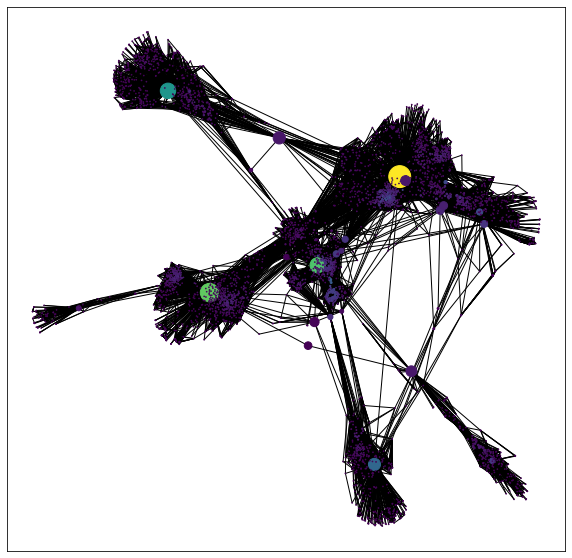

In [18]:
pos = nx.spring_layout(G)
bc_fb = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [20000*G.degree(v) for v in G]
node_size = [v*1000 for v in bc_fb.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos=pos, with_labels=False, node_color=node_color, node_size=node_size)

Name: 
Type: Graph
Number of nodes: 107
Number of edges: 563
Average degree:  10.5234


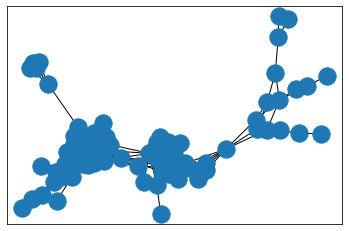

In [9]:
#take sample of the graph
random_nodes_from_G_fb = random.sample(G.nodes, 500)
random_subgraph_from_fb = G.subgraph(random_nodes_from_G_fb)
largest_cc_nodes = max(nx.connected_components(random_subgraph_from_fb), key=len)
random_subgraph_fb_lcc = G.subgraph(largest_cc_nodes)
pos = nx.spring_layout(random_subgraph_fb_lcc)
print(nx.info(random_subgraph_fb_lcc))
nx.draw_networkx(random_subgraph_fb_lcc, pos=pos, with_labels=False)

The facebook subgraph has 4 communities.
Modularity Approach: 0.086


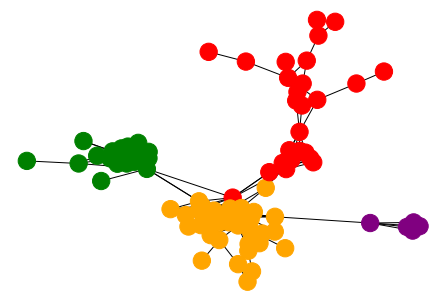

In [11]:
start = time.perf_counter()

communities3 = sorted(greedy_modularity_communities(random_subgraph_fb_lcc), key=len, reverse=True)
print(f"The facebook subgraph has {len(communities3)} communities.")

stop = time.perf_counter()
y = str(round((stop - start),3))
print("Modularity Approach: " + y)

#NOTE
#This is set up for 4 communities. Need to add more colors for more communities and less for less communities
color_map = []
for node in random_subgraph_fb_lcc:
    if node in communities3[0]:
        color_map.append('orange')
    if node in communities3[1]:
        color_map.append('green')
    if node in communities3[2]:
        color_map.append('red')
    if node in communities3[3]:
        color_map.append('purple')
    #if node in communities3[4]:
     #   color_map.append('blue')
        
nx.draw(random_subgraph_fb_lcc, node_color=color_map, with_labels=False)

Girvan Newman Approach: 0.0


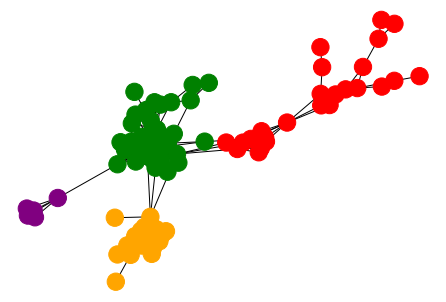

In [17]:
import itertools
start = time.perf_counter()

k = 3
comp = girvan_newman(random_subgraph_fb_lcc)

stop = time.perf_counter()
x = str(round((stop - start),3))
print("Girvan Newman Approach: " + x)

i = 0
for communities in itertools.islice(comp, k):
    if i == (k-1):   
        holder = communities 
    i += 1

color_map = []
for node in random_subgraph_fb_lcc:
    if node in holder[0]:
        color_map.append('orange')
    if node in holder[1]:
        color_map.append('green')
    if node in holder[2]:
        color_map.append('red')
    if node in holder[3]:
        color_map.append('purple')
        
nx.draw(random_subgraph_fb_lcc, node_color=color_map, with_labels=False)

Girvan Newman Approach: 0.0


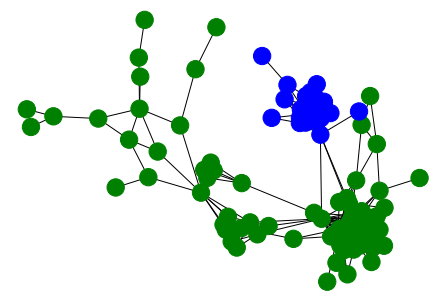

In [15]:
#girvan newman
start = time.perf_counter()

communities = girvan_newman(random_subgraph_fb_lcc)
#print(tuple(sorted(c) for c in next(comp)))

stop = time.perf_counter()
x = str(round((stop - start),3))
print("Girvan Newman Approach: " + x)

node_groups = []
for com in next(communities):
    node_groups.append(list(com))
    
#print(node_groups)

#Divided into 2 communities
color_map = []
for node in random_subgraph_fb_lcc:
    if node in node_groups[0]:
        color_map.append('blue')
    else:
        color_map.append('green')
nx.draw(random_subgraph_fb_lcc, node_color=color_map, with_labels=False)
plt.show()

In [26]:
start = time.perf_counter()

communities_test = sorted(greedy_modularity_communities(G), key=len, reverse=True)
print(f"The facebook graph has {len(communities_test)} communities.")

stop = time.perf_counter()
p = str(round((stop - start),3))
print("Modularity Approach: " + p)

The facebook graph has 13 communities.
Modularity Approach: 21.642


In [ ]:
import itertools
start = time.perf_counter()

k = 13
communities_GN = girvan_newman(G)
for communities in itertools.islice(communities_GN, k):
    print(tuple(sorted(c) for c in communities))

stop = time.perf_counter()
o = str(round((stop - start),3))
print("Girvan Newman Approach: " + o)